# Identifying Risk Factors for Heart Disease

**Our Team: Kurhekar, Samata and Veeraganti, Shourya**

**CSCI S-89a Deep Learning, Summer 2019 Harvard University Extension School Prof. Zoran B. Djordjević**

**MOTIVATION** 

In the United States, we see nearly 25% of all deaths every year happen due to cardiac related death. Some health conditions lifestyle, age and family history are called risk factors as they can trigger heart diseases. While we cannot control certain factors, we could control few other factors like smoking, obese and more. In this project we are exploring medical records for diabetic patients that contains information about heart disease risk factors such as high blood pressure, cholesterol levels, obesity, smoking status, etc which can be controlled with awareness.

**SUMMARY**

**Problem Statement:**<br>
To develop a classification model which can identify the medically relevant heart disease risk factors for any given patient from medical records using deep learning and natural language processing techniques, so that the patient can take appropriate measures for prevention
<br>
**Dataset:**<br>
Data for this project is provided by Partners HealthCare and was accessible via Harvard Medical School (Blavatnik Institute Biomedical Informatics) DBMI Data Portal under n2c2 NLP Research Data sets. Each patient’s medical record information is an xml document with 2 parts to it. First part consists of doctor notes in the form unstructured text. Second part is manually annotated risk factors related to heart disease as xml tags and tag attributes
<br>
**Methodology:**<br>
For the classification of doctor notes we compared Deep Neural networks GRU and CNN with Keras embedding layer and Word2Vec embedding layer. 
<br>**Challenges:**<br>
1.	Reading the annotations was challenging. We followed the annotation guidelines provided by  
HMS closely to create accurate classes (y set) for training the model. For example to populate family history we used TAG=FAMILY_HIST and attribute ‘indicator’=’not present’
For risk factor SMOKER, we observed that ~47% had missing data. The records had ‘status’=’unknown’. For such records we created a separate class SMOKER_UNKN. 
2.	While cleaning the free text it was challenging for us to identify the stopwords. For example, word ‘mg’ is more relevant to risk factor ‘MEDICATION’ while it is a stopword for ‘FAMILY_HIST’. Creating list of stopwords with help of experts in medical field would increase the model accuracy.
3.	Deep Learning Networks are difficult to train due to large number of trainable hyper parameters
<br>**Results:**<br>
Our best performing model is CNN1D with Word2Vec embedding. We achieved overall f1 score of 0.85 with precision of 0.82 and recall of 0.88. Risk factors ‘MEDICATION’ and ‘DIABETES’ has f1 score of 0.95 as it has high representation in the dataset while ‘OBESE’ and ‘FAMILY_HIST’ has f1 score of 0.21 and 0.29 respectively with low representation in the dataset.	
<br>**Links:**<br>
•	**Detailed Report:** “IdentifyingRiskFactorsforHeartDisease_Report”<br>
•	**Slides:** “IdentifyingRiskFactorsforHeartDisease_Slides”<br>
•	**2 mins Summary - YouTube video link:** <url>

Mount Google Drive to access data files

In [0]:
# If you are working on Google Collaboratory and you have your files on Google Drive, then you use the below command to mount your drive and access data files

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Read Data
from XML files into pandas dataframe

In [0]:
# Import package to parse xml files
import xml.etree.ElementTree as ET

# Import data processing packages
import os
import pandas as pd
import numpy as np

# Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import text processing package
import nltk

# Obtain current working directory
os.getcwd()

# to unzip data files using google colab
from zipfile import ZipFile

'/content'

In [0]:
# Set your drive path to point to a variable, you could also set this path to be the current working directory
root_path = os.getcwd() + "/drive/My Drive/Colab Notebooks/cs89a/Project"
root_path

'/content/drive/My Drive/Colab Notebooks/cs89a/Project'

Data downloaded from n2c2 NLP Research Data sets were all ".tar.gz" files, since we had our train and test sets split up as 60:40 ratio, we combined all data into 1 file.  We wanted to increase our train dataset size so we changed the split to 80:20  This is a zip file which was unzipped using the code below. 

Then we split out data into train (80%) and test (20%) using sklearn "train_test_split" method below. Train data was further split into train(90%) and validation (10%) during model training.

In [0]:
# Unzip '.tar.gz' train files

#### Run only once for the first time, when you have your data on a zip file  ####

filename = root_path + '/training-RiskFactors-Complete-Set.zip'

with ZipFile(filename, 'r') as zip:
  zip.extractall(root_path + '/')
  print('unzip complete')

In [0]:
# Parse XML files into pandas dataframe


# READ TRAIN FILES
file_list= root_path + '/filelist.txt'
path_file= root_path + '/TRAIN_DATA_training-RiskFactors-Complete-Set'


lineList = [line.rstrip('\n') for line in open(file_list)]

rsk_factors=pd.DataFrame(columns=['id','indicator','rsk_factor','status','time','type1','type2'])  # Read annotated text
doc_notes=pd.DataFrame(columns=['file_id','doc_notes'])   # Read unstructured doctor notes

for file_name in lineList:
    if file_name!='':
        parsedXML = ET.parse(path_file+'/'+file_name)

        root = parsedXML.getroot()
        for child in root:
            if child.tag == 'TEXT':
                note_dict= {'file_id':file_name[:-4],'doc_notes':child.text}
                doc_notes=doc_notes.append(pd.DataFrame([note_dict]))   

            for child1 in child:
                data_dict={'rsk_factor':child1.tag}
                data_dict.update( child1.attrib )
                data_dict.update(file_id=file_name[:-4])
                temp_df=pd.DataFrame([data_dict])
                rsk_factors=rsk_factors.append(temp_df)


print("Reading Complete")

In [0]:
# Write dataframes into csv files - you can uncomment below code and run if needed

# rsk_factors.to_csv(root_path+'/saved_csv/rsk_factors.csv')
# doc_notes.to_csv(root_path+'/saved_csv/doc_notes.csv')

In [0]:
# Read from csv files into dataframe - you can uncomment below code and run if needed

# rsk_factors=pd.read_csv(root_path+'/saved_csv/rsk_factors.csv')
# doc_notes=pd.read_csv(root_path+'/saved_csv/doc_notes.csv')

# rsk_factors.drop(columns=['Unnamed: 0'], inplace=True)
# doc_notes.drop(columns=['Unnamed: 0'], inplace=True)

In [0]:
# View first 5 records from the dataframe
rsk_factors.head()

,TYPE,end,file_id,id,indicator,rsk_factor,start,status,text,time,type1,type2
0,NaN,NaN,100-01,DOC0,NaN,MEDICATION,NaN,NaN,NaN,during DCT,calcium channel blocker,NaN
1,NaN,NaN,100-01,DOC1,NaN,MEDICATION,NaN,NaN,NaN,after DCT,metformin,NaN
2,NaN,NaN,100-01,DOC3,NaN,MEDICATION,NaN,NaN,NaN,after DCT,sulfonylureas,NaN
3,NaN,NaN,100-01,DOC4,NaN,MEDICATION,NaN,NaN,NaN,before DCT,metformin,NaN
4,NaN,NaN,100-01,DOC5,NaN,MEDICATION,NaN,NaN,NaN,during DCT,metformin,NaN


**Notations explained:**

0 - patient did not have the risk factor

1 - patient had the respective risk factor

In case of missing values, which happens to be with the risk factor 'SMOKER' in our case, we have classified missing data into a third class and then one hot encoded to 'SMOKER' and 'SMOKER UNKN' variables, which hold data for (a) patient is a smoker (b) patient has never smoked (c) we do not have information on the smoking status of the patient

In [0]:
rsk_factors.fillna(0, inplace=True)  # Replace NaN with 0 since they indicate that the patient did not have that risk factor

Tag ' PHI' is dropped since it's not a risk factor, it stands for "Protected Health Information" that protects “individually identifiable health information” in any form (electronic medical records in our case)

In [0]:
#Replacing SMOKERS having 'unknown' status by SMOKER_UNKN
print(rsk_factors.shape)
rsk_factors['rsk_factor']=np.where((rsk_factors['rsk_factor']=='SMOKER') & (rsk_factors['status']=='unknown'),
                                   'SMOKER_UNKN', rsk_factors['rsk_factor'])

#Removing rows with PHI as risk factor, having no family history, smoker information
rsk_factors.drop(rsk_factors.loc[(rsk_factors['rsk_factor'] == 'SMOKER') & (rsk_factors['status'] == 'never')].index, inplace=True)  # check attribute and assign value to SMOKER variable value
rsk_factors.drop(rsk_factors.loc[(rsk_factors['rsk_factor'] == 'FAMILY_HIST') & (rsk_factors['indicator'] == 'not present')].index, inplace=True)  # check attribute and assign value to FAMILY_HIST variable
rsk_factors.drop(rsk_factors.loc[(rsk_factors['rsk_factor'] == 'PHI') ].index, inplace=True)   # drop PHI tag
print(rsk_factors.shape)

#Creating list of risk factors for each file id
rsk_factor_lst=rsk_factors.groupby('file_id')['rsk_factor'].apply(list)

#Removing duplicates in each list
rsk_factor_lst=rsk_factor_lst.apply(lambda x: list(dict.fromkeys(x)))

(39543, 12)
(25904, 12)


In [0]:
# View first 5 records of the dataframe
rsk_factor_lst.head()

file_id
100-01                               [MEDICATION, DIABETES]
100-02                              [SMOKER_UNKN, DIABETES]
100-03            [MEDICATION, HYPERTENSION, CAD, DIABETES]
100-04    [HYPERLIPIDEMIA, MEDICATION, HYPERTENSION, CAD...
100-05    [HYPERLIPIDEMIA, MEDICATION, CAD, SMOKER, DIAB...
Name: rsk_factor, dtype: object

In [0]:
# Write cleaned rsk factors per file id into a csv file
# rsk_factor_lst.to_csv(root_path+'/saved_csv/rsk_factor_lst.csv')

# Read rsk factors into a dataframe "rsk_factor_lst"
# rsk_factor_lst=pd.read_csv(root_path+'/saved_csv/rsk_factor_lst.csv')

From sklearn we use 'MultiLabelBinarizer' to transform between iterable of iterables and a multilabel format. This transformer converts between this intuitive format and the supported multilabel format: a (samples x classes) binary matrix indicating the presence of a class label.

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
rsk_factors_binary=mlb.fit_transform(rsk_factor_lst)

In [0]:
print("Number of unique medical records is: ", rsk_factors.file_id.nunique())  # print number of unique records or number of patients
print("Labels for unique risk factors are: ", rsk_factors.rsk_factor.unique())  # print names of all risk factors after data cleanup
print("Number of doctor notes is:", doc_notes.shape[0]) # print number of records in the doc_notes dataframe

1304
['MEDICATION' 'DIABETES' 'SMOKER_UNKN' 'HYPERTENSION' 'CAD'
 'HYPERLIPIDEMIA' 'SMOKER' 'OBESE' 'FAMILY_HIST']
(1304, 2)


In [0]:
# Calculate the proportion of records for each risk factor

n=rsk_factors.file_id.nunique()
rsk_factor_prop = np.sum(rsk_factors_binary, axis=0)/n
print("Proportion of records for each risk factor\n")
rsk_factor_prop

array([0.43711656, 0.69018405, 0.03144172, 0.46088957, 0.76303681,
       0.88190184, 0.1809816 , 0.27990798, 0.4708589 ])

In [0]:
# print class names in the sorted order when data was fit to it using multilabelbinarizer
classes=mlb.classes_
print(classes)

['CAD' 'DIABETES' 'FAMILY_HIST' 'HYPERLIPIDEMIA' 'HYPERTENSION'
 'MEDICATION' 'OBESE' 'SMOKER' 'SMOKER_UNKN']


# Exploratory Data Analysis

In [194]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Import Word Cloud package for visualization
from wordcloud import WordCloud

# Import Counter from Collection
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Visualization of RiskFactors present in patients**

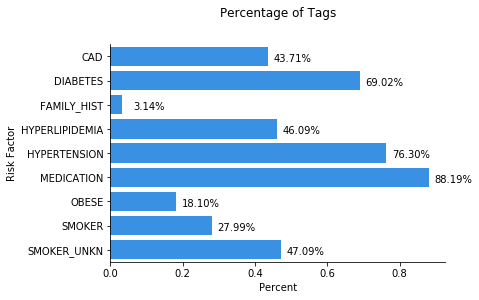

In [0]:
# Bar plot showing number of patients are tagged with corresponding risk factor as a percentage of the total

ax=sns.barplot(x=rsk_factor_prop, y=classes, color='dodgerblue')
ax.set(xlabel="Percent", ylabel='Risk Factor',);
ax.set_title('Percentage of Tags', y=1.1)    
for p in ax.patches:
  width = p.get_width()
  ax.text(width+0.12  ,
            p.get_y()+p.get_height()/2. + 0.2,
            "{0:.2f}%".format(width * 100),
            ha="right")
sns.despine()

**Word cloud**

Visualization of words associated with a specific risk factor. This helps us to determine what are the general stop words relevant to all risk factors and which words may have a larger influence during data modeling. 

- Specific stopwords are removed for each risk factor visualization using  word cloud to derive generic words.

- These stopwords are refreshed and only generic stopwords are removed before modeling.

In [195]:
doc_notes['doc_notes1'] = doc_notes['doc_notes'].apply(lambda x: ' '.join(x.split()))
doc_notes['doc_notes1'] = doc_notes['doc_notes1'].apply(lambda x: x.lower())
doc_notes['doc_notes1'] = doc_notes['doc_notes1'].apply(lambda x: re.sub(r"[^a-zA-Z]+",r' ', x))
doc_notes['doc_notes1'] = doc_notes['doc_notes1'].apply(lambda x: re.sub(r"record date",r' ', x))

doc_notes.head()

,doc_notes,file_id,doc_notes1
0,\n\n\nRecord date: 2106-02-12\n\nCampbell Orth...,100-01,campbell orthopedic associates madera circle...
1,\n\n\nRecord date: 2108-03-14\n\n ...,100-02,campbell emergency dept visit valdez harlan ...
2,\n\n\nRecord date: 2109-09-14\n\n \nSeptember ...,100-03,september vicente blair m d internal medical...
3,\n\n\nRecord date: 2111-10-10\n\n \n\n\n\nC...,100-04,ccu jar transfer note admission date transfe...
4,\n\n\nRecord date: 2111-12-14\n\n \n\n\n\nNEUR...,100-05,neurology cmf admission note name valdez har...


In [196]:
merged = pd.merge(rsk_factor_lst, doc_notes, on='file_id')
merged.head()

,file_id,rsk_factor,doc_notes,doc_notes1
0,100-01,"[MEDICATION, DIABETES]",\n\n\nRecord date: 2106-02-12\n\nCampbell Orth...,campbell orthopedic associates madera circle...
1,100-02,"[SMOKER_UNKN, DIABETES]",\n\n\nRecord date: 2108-03-14\n\n ...,campbell emergency dept visit valdez harlan ...
2,100-03,"[MEDICATION, HYPERTENSION, CAD, DIABETES]",\n\n\nRecord date: 2109-09-14\n\n \nSeptember ...,september vicente blair m d internal medical...
3,100-04,"[HYPERLIPIDEMIA, MEDICATION, HYPERTENSION, CAD...",\n\n\nRecord date: 2111-10-10\n\n \n\n\n\nC...,ccu jar transfer note admission date transfe...
4,100-05,"[HYPERLIPIDEMIA, MEDICATION, CAD, SMOKER, DIAB...",\n\n\nRecord date: 2111-12-14\n\n \n\n\n\nNEUR...,neurology cmf admission note name valdez har...


In [0]:
# Function to create a Word cloud for each risk factor
def run_word_cloud(df_cloud, title):
  plt.figure(figsize=(10,15))
  text = df_cloud.values
  cloud_toxic = WordCloud(stopwords=stop_words,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800).generate(" ".join(text))
  plt.axis('off')
  plt.title("Word Cloud for " + title,fontsize=15)
  plt.imshow(cloud_toxic);

These stop words are not relevant to FAMILY_HIST risk factor and it is removed to before visualing with a word cloud

In [0]:
# update stop words
stop_words.update(['po', 'mg', 'without', 'daily', 'qd', 'continue', 'bid', 'patient'])
stop_words.update(['disease', 'year', 'time', 'well', 'history', 'pain', 'doctor', 'general', 'exam', 'age', 'pt', 'medication', 'date', 'since', 'dr', 'years',
                     'showed', 'insulin', 'note','soft', 'ua', 'md','exam', 'test', 'mr', 'old', 'medications', 'allergies', 'visit', 'day', 'given', 'see', 'neck', 'start', 'may', 'home', 'noted'])
stop_words.update(['change','however','change', 'likely', 'evidence','review', 'recent', 'underwent', 'use', 'also', 'today', 'month', 'week','two', 'report', 'take','none', 'symptoms',
                  'dl', 'th', 'check', 'system', 'days', 'minute', 'hospital', 'past'])

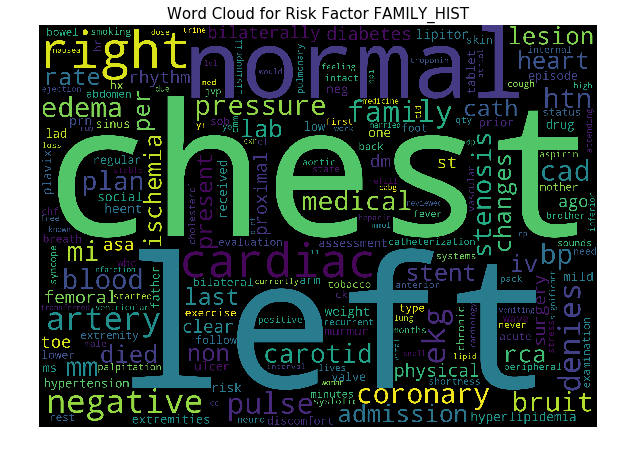

In [183]:
merged['FAMILY_HIST'] = [ int('FAMILY_HIST' in r) for r in merged['rsk_factor']]
df_family_hist = merged[merged['FAMILY_HIST']==1]['doc_notes1']
run_word_cloud(df_family_hist, title='Risk Factor FAMILY_HIST')

In [0]:
stop_words.update(['chest','rate','prn','htn','dm'])

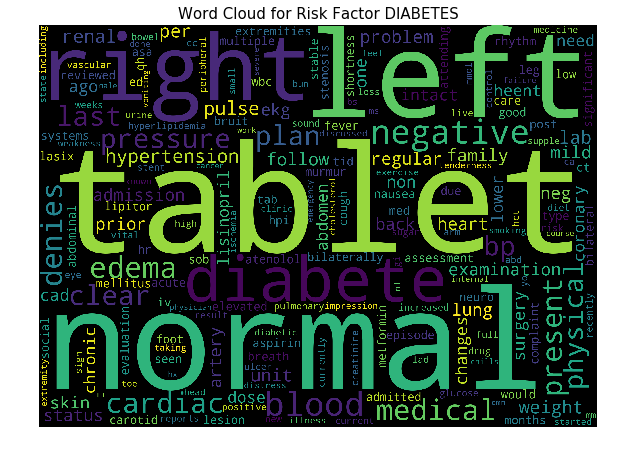

In [186]:
merged['DIABETES'] = [ int('DIABETES' in r) for r in merged['rsk_factor']]
df_diabetes = merged[merged['DIABETES']==1]['doc_notes1']
run_word_cloud(df_diabetes, title='Risk Factor DIABETES')

In [0]:
stop_words.update(['dr','bid','note'])

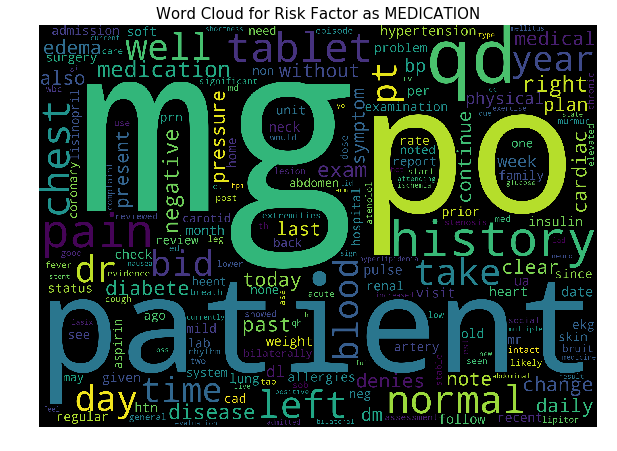

In [197]:
merged['MEDICATION'] = [ int('MEDICATION' in r) for r in merged['rsk_factor']]
df_medication = merged[merged['MEDICATION']==1]['doc_notes1']
run_word_cloud(df_medication, title='Risk Factor as MEDICATION')

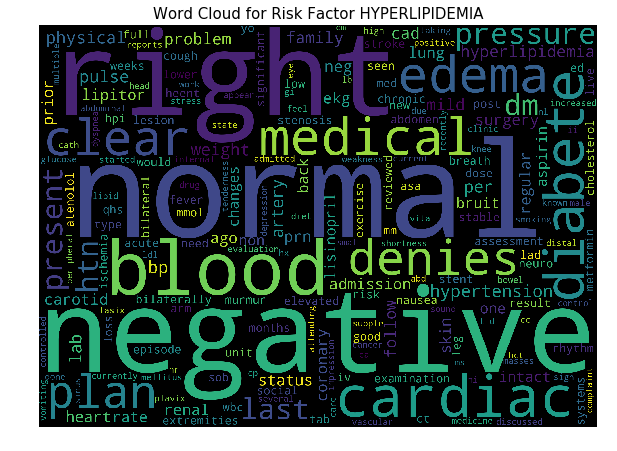

In [201]:
stop_words.update(['dr','bid','note','tablet', 'chest', 'left'])
merged['HYPERLIPIDEMIA'] = [ int('HYPERLIPIDEMIA' in r) for r in merged['rsk_factor']]
df_hyperlipidemia = merged[merged['HYPERLIPIDEMIA']==1]['doc_notes1']
run_word_cloud(df_hyperlipidemia, title='Risk Factor HYPERLIPIDEMIA')

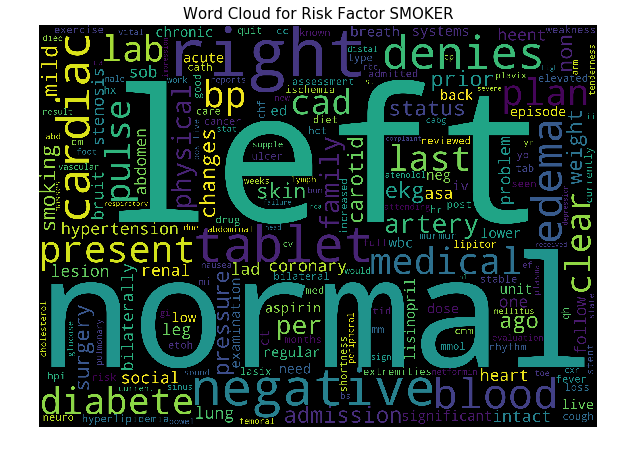

In [190]:
merged['SMOKER'] = [ int('SMOKER' in r) for r in merged['rsk_factor']]
df_smoker = merged[merged['SMOKER']==1]['doc_notes1']
run_word_cloud(df_smoker, title='Risk Factor SMOKER')

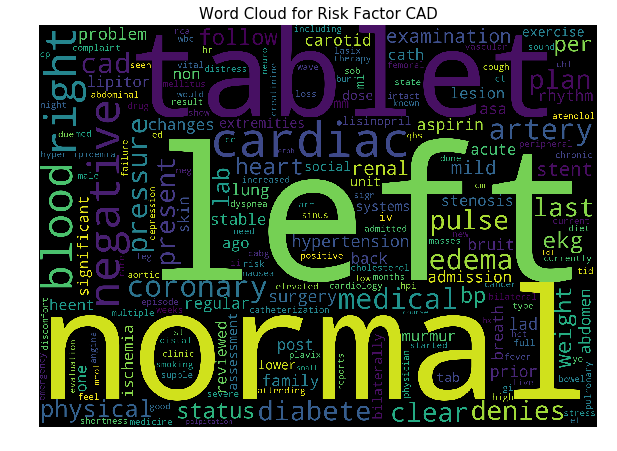

In [193]:
merged['CAD'] = [ int('CAD' in r) for r in merged['rsk_factor']]
df_cad = merged[merged['CAD']==1]['doc_notes1']
run_word_cloud(df_cad, title='Risk Factor CAD')

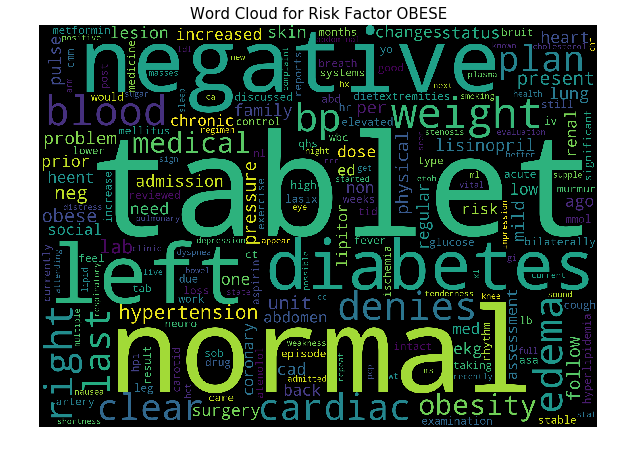

In [191]:
merged['OBESE'] = [ int('OBESE' in r) for r in merged['rsk_factor']]
df_obese = merged[merged['OBESE']==1]['doc_notes1']
run_word_cloud(df_obese, title='Risk Factor OBESE')

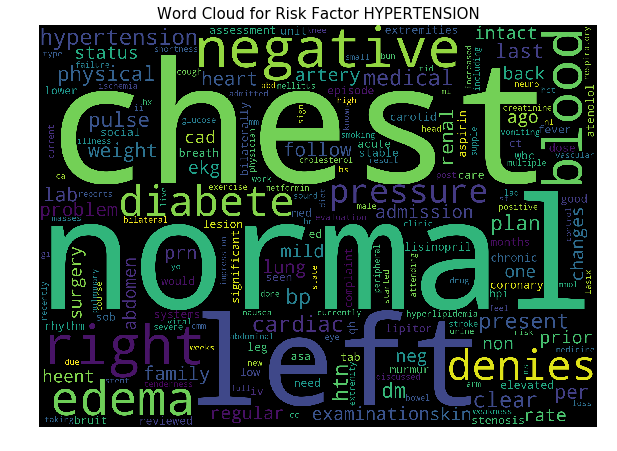

In [200]:
merged['HYPERTENSION'] = [ int('HYPERTENSION' in r) for r in merged['rsk_factor']]
df_hypertension = merged[merged['HYPERTENSION']==1]['doc_notes1']
run_word_cloud(df_hypertension, title='Risk Factor HYPERTENSION')

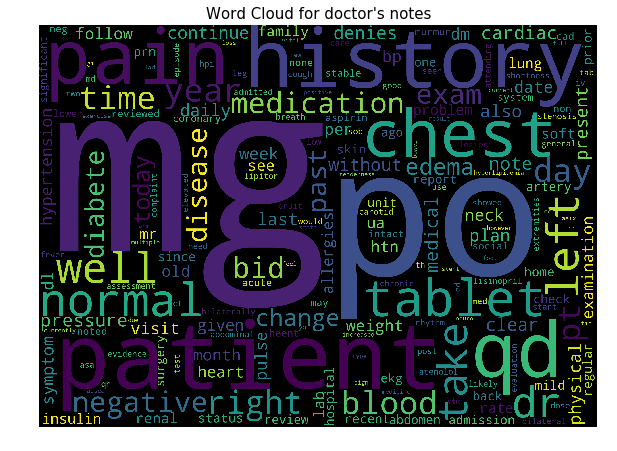

In [0]:
### OVERALL --- WORD CLOUD
df_all_factors = merged['doc_notes1']
run_word_cloud(df_all_factors, title="doctor's notes")

# Text Processing for Data Models

In [0]:
# Import keras text preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# reset stop_words and remove relevant general stop words only
stop_words = set(stopwords.words('english'))

**Remove general stop words**

In [0]:
# Update stop words to the object 'stop_words'

stop_words.update(['qd','l','p','h','w','r','x','c','u','q','b','f','0','1','2','3','4','5','6','7','8','9','10','11','12','01'])   #single letter words
stop_words.update(['po','mg','well','note','bid','dr','year','time','well','bid','visit','day','time','week','general','days','minute']) #generic stop words

In [0]:
# Remove stop words from "doc_notes" dataframe
doc_notes['doc_notes1'] = doc_notes['doc_notes1'].apply(lambda x : " ".join([item for item in x.split() if item not in stop_words]))

In [0]:
# define hyperparameters
num_words = 10000   # number of most common words from the text after text pre-processing
maxlen = 1500  # maximum length of the sentence(doctor notes in each file) after padding sequences


tokenizer = Tokenizer(num_words=num_words, lower=True)
tokenizer.fit_on_texts(doc_notes.doc_notes1)
sequences = tokenizer.texts_to_sequences(doc_notes.doc_notes1)
x = pad_sequences(sequences, maxlen=maxlen, padding='post')

Using TensorFlow backend.


In [0]:
# Print vectors from the tokenized text
print(x) 

[[9098 3205  991 ...    0    0    0]
 [9098  186  938 ...    0    0    0]
 [1186 2928  227 ...    0    0    0]
 ...
 [ 135    8  100 ...    0    0    0]
 [  72  213    8 ...    0    0    0]
 [9683  950   63 ...    0    0    0]]


In [0]:
# Split the data into train and test using sklearn train_test_split method
x_train, x_test, y_train, y_test = train_test_split(x, rsk_factors_binary, test_size=0.2, random_state=42)

# Models

This is a multi-label classification problem, with binary classification on every risk factor, since every tag has 2 classes.

Since we have an imbalanced dataset, we are not using accuracy as a metric to measure the performance of classification model. We will be using multi-label confusion matrix and f1 score to determine the best model and it's performance.

In [0]:
# Import Keras data modeling
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D, GRU, Bidirectional, TimeDistributed, LSTM
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import keras

# Import metrics to measure model performance
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Import to split the data into train and test sets
from sklearn.model_selection import train_test_split

In [0]:
# Used for formatting print statements
class color:
   RED = '\033[91m'
   BOLD = '\033[1m'
   END = '\033[0m'

In [0]:
'''PREDICTED PROBABILITIES TO PREDICTED CLASSES'''
# Funtion that converts predicted probabilities to predicted classes

def pred_to_label(y_pred, threshold):
  y_pred_label = np.zeros(y_pred.shape)
  for j in range(y_pred.shape[0]):
    for i in range(y_pred.shape[1]):
      if y_pred[j][i] < threshold:
        y_pred_label[j][i] = 0
      else:
        y_pred_label[j][i] = 1
  return y_pred_label

In [0]:
'''CLASSIFICATION REPORT'''

def classification_report_for_model(y_true, y_pred, threshold):
  print(color.BOLD + color.RED + "Classification report for threshold value " + str(threshold) + color.END, "\n")
  print(classification_report(y_true, pred_to_label(y_pred, threshold=0.8)))

In [0]:
'''TRAINING AND VALIDATION PLOT'''
def plot_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1,len(loss)+1)

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

In [0]:
# hyperparameters - set values
max_words = num_words
num_classes = 9
epochs = 10
batch_size = 32
maxlen = 1500
embedding_dim=85

## Embedding layer model - Baseline model

Embedding layer is a word embedding that is learned jointly with a neural network model on a specific natural language processing task, one-hot encoded words are mapped to the word vectors.

In [0]:
# EMBEDDING LAYER MODEL  --- BASELINE MODEL

import warnings
warnings.filterwarnings('ignore')

callbacks = [ModelCheckpoint(filepath='model-embed.h5', save_best_only=True)]

model_embed = Sequential()
model_embed.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_embed.add(Dropout(0.30))
# model_embed.add(GlobalMaxPool1D())
model_embed.add(Dense(num_classes, activation='sigmoid'))

model_embed.compile(optimizer=Adam(0.015), loss='binary_crossentropy')

history_embed = model_embed.fit(x_train, y_train,
#                     class_weight=class_weight,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=callbacks)

Train on 938 samples, validate on 105 samples
Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.5495 - val_loss: 0.5148
Epoch 2/10
938/938 [==============================] - 0s 359us/step - loss: 0.4630 - val_loss: 0.4526
Epoch 3/10
938/938 [==============================] - 0s 365us/step - loss: 0.3658 - val_loss: 0.3793
Epoch 4/10
938/938 [==============================] - 0s 367us/step - loss: 0.2928 - val_loss: 0.3269
Epoch 5/10
938/938 [==============================] - 0s 358us/step - loss: 0.2318 - val_loss: 0.3053
Epoch 6/10
938/938 [==============================] - 0s 361us/step - loss: 0.1911 - val_loss: 0.2967
Epoch 7/10
938/938 [==============================] - 0s 362us/step - loss: 0.1570 - val_loss: 0.2970
Epoch 8/10
938/938 [==============================] - 0s 355us/step - loss: 0.1298 - val_loss: 0.2864
Epoch 9/10
938/938 [==============================] - 0s 359us/step - loss: 0.1148 - val_loss: 0.3029
Epoch 10/10
938/938 [=================

In [157]:
model_embed.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 1500, 85)          850000    
_________________________________________________________________
dropout_15 (Dropout)         (None, 1500, 85)          0         
_________________________________________________________________
global_max_pooling1d_15 (Glo (None, 85)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 9)                 774       
Total params: 850,774
Trainable params: 850,774
Non-trainable params: 0
_________________________________________________________________


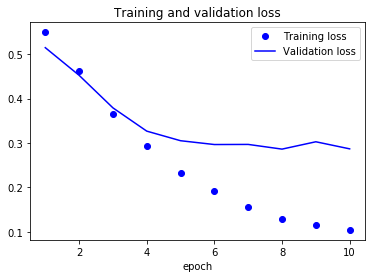

In [0]:
plot_training_history(history_embed) # plot of training and validation loss

In [158]:
metrics = model_embed.evaluate(x_test, y_test)
print("{}: {}".format(model_embed.metrics_names, metrics))

261/261 [==============================] - 1s 3ms/step
['loss']: 0.7547671488875174


In [0]:
# compute predictions on test dataset
y_pred = model_embed.predict(x_test)  

In [172]:
# Multi-label Confusion Matrix
multilabel_confusion_matrix(y_test, pred_to_label(y_pred, threshold=0.5))

array([[[ 65,  78],
        [ 61,  57]],

       [[ 10,  71],
        [ 18, 162]],

       [[255,   0],
        [  6,   0]],

       [[ 84,  65],
        [ 56,  56]],

       [[  2,  66],
        [ 14, 179]],

       [[  1,  39],
        [  2, 219]],

       [[178,  36],
        [ 42,   5]],

       [[156,  38],
        [ 52,  15]],

       [[115,  20],
        [ 77,  49]]])

In [173]:
print("F1 score is : {:.2f}".format(f1_score(y_test, pred_to_label(y_pred, threshold=0.5), average='micro')))

F1 score is : 0.67


**Empircally determing threshold value**
In order to convert each label's predicted propabilities to predicted classes, we trained the model on various threshold values between 0 and 1 to determine empircally best value for threshold as 0.5, few trials is shown below and we decided upon threshold value 0.5 as the best one.

In [0]:
# Classification report

# Also to determine the threshold empirically
classification_report_for_model(y_test, pred_to_label(y_pred, threshold=0.8), threshold=0.8)
classification_report_for_model(y_test, pred_to_label(y_pred, threshold=0.6), threshold=0.6)
classification_report_for_model(y_test, pred_to_label(y_pred, threshold=0.5), threshold=0.5)
classification_report_for_model(y_test, pred_to_label(y_pred, threshold=0.2), threshold=0.2)

Classification report for threshold value 0.8 

              precision    recall  f1-score   support

           0       0.91      0.58      0.70       118
           1       0.95      0.84      0.89       180
           2       0.00      0.00      0.00         6
           3       0.88      0.78      0.82       112
           4       0.90      0.84      0.87       193
           5       0.94      0.93      0.93       221
           6       0.92      0.70      0.80        47
           7       0.86      0.48      0.62        67
           8       0.98      0.44      0.61       126

   micro avg       0.92      0.74      0.82      1070
   macro avg       0.81      0.62      0.69      1070
weighted avg       0.92      0.74      0.81      1070
 samples avg       0.89      0.73      0.78      1070

Classification report for threshold value 0.6 

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       118
           1       0.88      0.94   

## CNN 1D Model

2nd model is a CNN1D , a one-dimensional CNN model that has a convolutional hidden layer and operates over a 1D sequence

In [0]:
filter_length = 300

model_cnn = Sequential()
model_cnn.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model_cnn.add(GlobalMaxPool1D())
model_cnn.add(Dense(num_classes))
model_cnn.add(Activation('sigmoid'))

model_cnn.compile(optimizer='adam', loss='binary_crossentropy')
model_cnn.summary()

callbacks = [ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)]

history_cnn = model_cnn.fit(x_train, y_train,
#                     class_weight=class_weight,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 1500, 85)          850000    
_________________________________________________________________
dropout_18 (Dropout)         (None, 1500, 85)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1498, 300)         76800     
_________________________________________________________________
global_max_pooling1d_18 (Glo (None, 300)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 9)                 2709      
_________________________________________________________________
activation_5 (Activation)    (None, 9)                 0         
Total params: 929,509
Trainable params: 929,509
Non-trainable params: 0
_________________________________________________________________
Trai

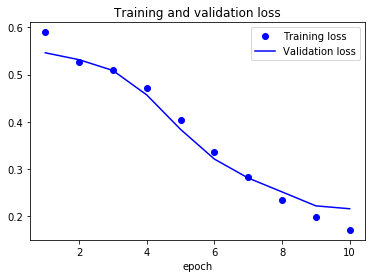

In [0]:
plot_training_history(history_cnn)

In [0]:
# cnn_model = keras.models.load_model('model-conv1d.h5')
# metrics = cnn_model.evaluate(x_test, y_test)

metrics = model_cnn.evaluate(x_test, y_test)
print("{}: {}".format(model_cnn.metrics_names, metrics))

261/261 [==============================] - 0s 525us/step
['loss']: 0.23022478573395375


In [169]:
y_pred = model_cnn.predict(x_test)

# print("F1 score overall classification is :", f1_score(y_test, pred_to_label(y_pred, threshold=0.5), average='weighted'))
print("\n Multilabel Confusion Matrix is:\n")
multilabel_confusion_matrix(y_test, pred_to_label(y_pred, threshold=0.5))


 Multilabel Confusion Matrix is:



array([[[102,  41],
        [ 63,  55]],

       [[ 30,  51],
        [ 61, 119]],

       [[255,   0],
        [  6,   0]],

       [[102,  47],
        [ 64,  48]],

       [[ 18,  50],
        [ 33, 160]],

       [[  0,  40],
        [  0, 221]],

       [[175,  39],
        [ 40,   7]],

       [[167,  27],
        [ 48,  19]],

       [[ 89,  46],
        [ 45,  81]]])

In [170]:
print("F1 score is : {:.2f}".format(f1_score(y_test, pred_to_label(y_pred, threshold=0.5), average='micro')))

F1 score is : 0.67


## Bidirectional GRU

Bidirectional GRU's are a type of bidirectional gated recurrent neural networks with only the input and forget gates. It allows for the use of information from both previous time steps and later time steps to make predictions about the current state.

In [0]:
callbacks = [ModelCheckpoint(filepath='model-gru.h5', save_best_only=True)]

model_bgru = Sequential()
model_bgru.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model_bgru.add(Bidirectional(GRU(16, return_sequences=True, kernel_initializer='glorot_normal')))
model_bgru.add(Bidirectional(GRU(8, return_sequences=False, kernel_initializer='glorot_normal')))
model_bgru.add(Dropout(0.25))
model_bgru.add(Dense(num_classes, activation="sigmoid"))

model_bgru.summary()
model_bgru.compile(optimizer=Adam(0.01), loss='binary_crossentropy')

history_bgru = model_bgru.fit(x_train, y_train,
#                     class_weight=class_weight,
                    epochs=15,
                    batch_size=16,
                    validation_split=0.1,
                    callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1500, 85)          850000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 1500, 32)          9792      
_________________________________________________________________
bidirectional_6 (Bidirection (None, 16)                1968      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 153       
Total params: 861,913
Trainable params: 861,913
Non-trainable params: 0
_________________________________________________________________
Train on 938 samples, validate on 105 samples
Epoch 1/15
938/938 [==============================] - 615s 656ms/step - loss: 0.5532 - val

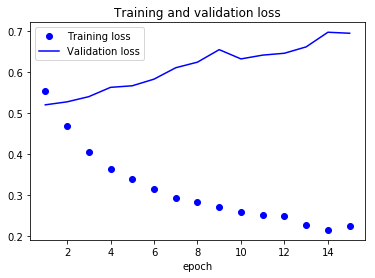

In [0]:
plot_training_history(history_bgru)

In [165]:
metrics = model_bgru.evaluate(x_test, y_test)
print("{}: {}".format(model_bgru.metrics_names, metrics))

261/261 [==============================] - 19s 71ms/step
['loss']: 0.5447348146146285


In [0]:
y_pred = model_bgru.predict(x_test)

In [167]:
print("\n Multilabel Confusion Matrix is:\n")
multilabel_confusion_matrix(y_test, pred_to_label(y_pred, threshold=0.5))


 Multilabel Confusion Matrix is:



array([[[143,   0],
        [117,   1]],

       [[  0,  81],
        [  0, 180]],

       [[255,   0],
        [  6,   0]],

       [[129,  20],
        [ 99,  13]],

       [[  0,  68],
        [  0, 193]],

       [[  0,  40],
        [  0, 221]],

       [[214,   0],
        [ 47,   0]],

       [[194,   0],
        [ 67,   0]],

       [[133,   2],
        [124,   2]]])

In [168]:
warnings.filterwarnings('ignore')
print("F1 score is : {:.2f}".format(f1_score(y_test, pred_to_label(y_pred, threshold=0.5), average='micro')))

F1 score is : 0.65


# Word2Vec

In [0]:
review_line=[]
#lines=doc_notes.doc_notes1.values.tolist()
lines = doc_notes['doc_notes1'].apply(lambda x : [item for item in x.split()])

In [0]:
import gensim

embedding_dim=250
word2vec1= gensim.models.Word2Vec(sentences=lines, size=embedding_dim, window=5, min_count=1, iter=10)

#Vocab size
words=list(word2vec1.wv.vocab)
print('Vocab size %d' % len(words))

w1='family'
word2vec1.wv.most_similar(positive='chest')

W0805 15:38:41.845890 140084174989184 base_any2vec.py:723] consider setting layer size to a multiple of 4 for greater performance


Vocab size 21728


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cau', 0.7374891638755798),
 ('prospective', 0.7180505394935608),
 ('dyspnea', 0.7010504603385925),
 ('ventilation', 0.6725202798843384),
 ('rest', 0.6685663461685181),
 ('exertion', 0.6616716384887695),
 ('exertional', 0.6562710404396057),
 ('substernal', 0.6538715958595276),
 ('palpitations', 0.6473546028137207),
 ('heartbeat', 0.6448646187782288)]

In [0]:
# convert the input data into a list of integer indexes aligning with the wv indexes
# Read the data into a list of strings.
def convert_data_to_index(string_data, wv):
    index_words = pd.DataFrame()
    i=0
    for sent in string_data:
      #index_sent=[]
      for word in sent:
        if word in wv:
          #index_sent.append(wv.vocab[word].index)  
          index_words=index_words.append({'sent_id' : i, 'word_index' : wv.vocab[word].index}, ignore_index=True)
      i+=1
      #print(i)
    index_data=index_words.groupby('sent_id')['word_index'].apply(list)
    return index_data

data_idx = convert_data_to_index(lines, word2vec1.wv)

In [0]:
# write to csv
data_idx.to_csv(root_path+"/word2vec_transformed_2.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [0]:
# READ csv file to pandas dataframe
data_idx = pd.read_csv(root_path + '/word2vec_transformed.csv')

In [0]:
embedding_matrix = np.zeros((len(word2vec1.wv.vocab), embedding_dim))
for i in range(len(word2vec1.wv.vocab)):
    embedding_vector = word2vec1.wv[word2vec1.wv.index2word[i]]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [0]:
new_X = pad_sequences(data_idx, maxlen=maxlen, padding="post")

In [0]:
x_train, x_test, y_train, y_test = train_test_split(new_X, rsk_factors_binary, test_size=0.2, random_state=42)

# Bidirectional GRU with Word2Vec

In [0]:
### Bidirectional GRU model with Word2Vec

callbacks = [ModelCheckpoint(filepath='model-w2v-bgru.h5', save_best_only=True)]

embeddings = Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                      weights=[embedding_matrix], input_length=maxlen, trainable=False)

model_w2v_bgru = Sequential()
model_w2v_bgru.add(embeddings)
model_w2v_bgru.add(Bidirectional(GRU(32, return_sequences=True)))
model_w2v_bgru.add(Bidirectional(GRU(8, return_sequences=False)))
model_w2v_bgru.add(Dropout(0.2))
model_w2v_bgru.add(Dense(num_classes, activation="sigmoid"))

model_w2v_bgru.summary()
model_w2v_bgru.compile(optimizer=Adam(0.015), loss='binary_crossentropy', metrics=['categorical_accuracy'])

history_w2v_bgru = model_w2v_bgru.fit(x_train, y_train,
#                     class_weight=class_weight,
                    epochs=25,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1500, 250)         5432000   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 1500, 64)          54336     
_________________________________________________________________
bidirectional_8 (Bidirection (None, 16)                3504      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 153       
Total params: 5,489,993
Trainable params: 57,993
Non-trainable params: 5,432,000
_________________________________________________________________
Train on 938 samples, validate on 105 samples
Epoch 1/25
938/938 [==============================] - 312s 333ms/step - loss: 0.5

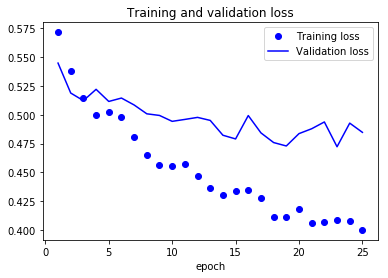

In [0]:
plot_training_history(history_w2v_bgru)

In [161]:
metrics = model_w2v_bgru.evaluate(x_test, y_test)
print("{}: {}".format(model_w2v_bgru.metrics_names, metrics))

261/261 [==============================] - 36s 139ms/step
['loss', 'categorical_accuracy']: [0.4827365107919978, 0.04597701155134545]


In [0]:
y_pred = model_w2v_bgru.predict(x_test)

In [163]:
print("\n Multilabel Confusion Matrix is:\n")
multilabel_confusion_matrix(y_test, pred_to_label(y_pred, threshold=0.5))


 Multilabel Confusion Matrix is:



array([[[120,  23],
        [ 68,  50]],

       [[ 33,  48],
        [ 28, 152]],

       [[255,   0],
        [  6,   0]],

       [[110,  39],
        [ 42,  70]],

       [[ 22,  46],
        [ 17, 176]],

       [[  8,  32],
        [ 16, 205]],

       [[214,   0],
        [ 47,   0]],

       [[183,  11],
        [ 51,  16]],

       [[ 94,  41],
        [ 25, 101]]])

In [164]:
print("F1 score is : {:.2f}".format(f1_score(y_test, pred_to_label(y_pred, threshold=0.5), average='micro')))

F1 score is : 0.74


# CNN1D with Word2Vec

In [0]:
### CNN1D model with Word2Vec


from keras import backend
backend.clear_session()


filter_length = 80
callbacks = [ModelCheckpoint(filepath='model-w2v-cnn.h5', save_best_only=True)]

embeddings = Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                      weights=[embedding_matrix], input_length=maxlen, trainable=False)


model_w2v_cnn = Sequential()
model_w2v_cnn.add(embeddings)
model_w2v_cnn.add(Dropout(0.3))
model_w2v_cnn.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model_w2v_cnn.add(GlobalMaxPool1D())
model_w2v_cnn.add(Dense(num_classes))
model_w2v_cnn.add(Activation('sigmoid'))


model_w2v_cnn.compile(optimizer='adam', loss='binary_crossentropy')
model_w2v_cnn.summary()

history_w2v_cnn = model_w2v_cnn.fit(x_train, y_train,
#                     class_weight=class_weight,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1500, 250)         5432000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500, 250)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1498, 80)          60080     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 729       
_________________________________________________________________
activation_1 (Activation)    (None, 9)                 0         
Total params: 5,492,809
Trainable params: 60,809
Non-trainable params: 5,432,000
_____________________________________________________________

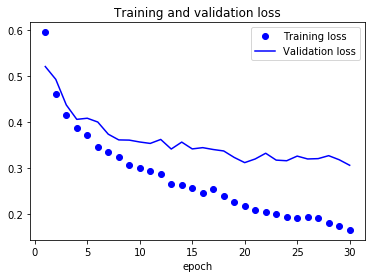

In [0]:
plot_training_history(history_w2v_cnn)

In [0]:
y_pred = model_w2v_cnn.predict(x_test)

In [0]:
print("\n Multilabel Confusion Matrix is:\n")
multilabel_confusion_matrix(y_test, pred_to_label(y_pred, threshold=0.5))


 Multilabel Confusion Matrix is:



array([[[115,  28],
        [ 17, 101]],

       [[ 70,  11],
        [  7, 173]],

       [[255,   0],
        [  5,   1]],

       [[ 89,  60],
        [ 17,  95]],

       [[ 32,  36],
        [  8, 185]],

       [[ 22,  18],
        [  3, 218]],

       [[200,  14],
        [ 40,   7]],

       [[168,  26],
        [ 16,  51]],

       [[125,  10],
        [ 15, 111]]])

In [0]:
print("F1 score is : {:.2f}".format(f1_score(y_test, pred_to_label(y_pred, threshold=0.5), average='micro')))

F1 score is : 0.85


In [0]:
from sklearn.metrics import precision_score
print("Precision is: {:.2f}".format(precision_score(y_test, pred_to_label(y_pred, threshold=0.5), average='micro')))

Precision is: 0.82


In [0]:
from sklearn.metrics import recall_score
print("Recall is: {:.2f}".format(recall_score(y_test, pred_to_label(y_pred, threshold=0.5), average='micro')))

Recall is: 0.88


# Model Comparison and Validation on metric 'f1score'

In [0]:
# Load all models

model_embed = keras.models.load_model('model-embed.h5')
model_cnn = keras.models.load_model('model-conv1d.h5')
model_bgru = keras.models.load_model('model-gru.h5')

model_w2v_bgru = keras.models.load_model('model-w2v-bgru.h5')
model_w2v_cnn = keras.models.load_model('model-w2v-cnn.h5')

In [0]:
from sklearn.metrics import f1_score
df = pd.DataFrame({'Risk Factor':[i for i in classes]})

models_=[model_embed, model_bgru, model_cnn, model_w2v_bgru, model_w2v_cnn]
col_names=['Embed', 'BGRU', 'CNN','W2V GRU', 'W2V CNN']
# predict on X for model FFNN
for i, val in enumerate(models_):
    y_pred = pred_to_label(val.predict(x_test), threshold=0.5)
    f1_lst=[]
    for j in range(num_classes):
      temp_f1=f1_score(y_test[:,j], y_pred[:,j], average=None)
      f1_lst.append(np.round(temp_f1[1],2))
    df[col_names[i]] = f1_lst

In [0]:
# View f1score for all models for each risk factor
df

,Risk Factor,Embed,BGRU,CNN,W2V GRU,W2V CNN
0,CAD,0.45,0.02,0.51,0.52,0.82
1,DIABETES,0.78,0.82,0.68,0.80,0.95
2,FAMILY_HIST,0.00,0.00,0.00,0.00,0.29
3,HYPERLIPIDEMIA,0.48,0.18,0.46,0.63,0.71
4,HYPERTENSION,0.82,0.85,0.79,0.85,0.89
5,MEDICATION,0.91,0.92,0.92,0.90,0.95
6,OBESE,0.11,0.00,0.15,0.00,0.21
7,SMOKER,0.25,0.00,0.34,0.34,0.71
8,SMOKER_UNKN,0.50,0.03,0.64,0.75,0.90


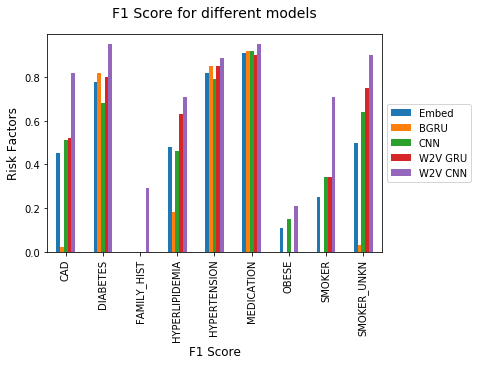

In [0]:
df.plot(x="Risk Factor", y=col_names, kind="bar");
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('F1 Score for different models', fontsize=14, y=1.05)
plt.xlabel('F1 Score', fontsize=12)
plt.ylabel('Risk Factors', fontsize=12)
plt.show();

- We compared model performance using metric 'f1 score' as this is a classification problem and we have an unbalanced dataset.

- We used the method "average=None" to calculate f1 score as this is a multi-label problem we compared the f1score values of category 1 (risk factor being present) against all 5 models.

- f1score for risk factor 'OBESE' and 'FAMILY_HIST' is very low since we have very few observations for this risk factor

# Results

- **Best performing model is CNN1D model with word2vec embedding**<br>
  (a) f1 score values is higher than all other models for each risk factor <br>

- Models with word2vec embedding show higher performance than those with simple keras embedding

- Risk Factor 'FAMILY_HIST' is not predicted by other models while only the best model 'CNN1D with word2vec' predicts the factor

- CNN1D with word2vec has a f1score of 0.85 for multi-label classification.
- CNN1D with word2vec has a precision score of 0.82 for multi-label classification. 
This means out of the total values predicted true(TruePositive+FalsePositive), 82% of them are correctly predicted (True Positive)

- CNN1D with word2vec has a recall score of 0.88 for multi-label classification. 
This means out of the total true values (TruePositive+FalseNegative), 88% of them are correctly predicted (True Positive)